In [2]:
import scipy.io
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

path = './wiki_crop'

dir_list = os.listdir(path)

print(len(dir_list))

101


In [3]:
mat = scipy.io.loadmat('./wiki_crop/wiki.mat')

In [4]:
columns = ["dob", "photo_taken", "full_path", "gender", "name", "face_location", "face_score", "second_face_score"]

instances = mat['wiki'][0][0][0].shape[1]

df = pd.DataFrame(index = range(0,instances), columns = columns)

for i in mat:
    if i == "wiki":
        current_array = mat[i][0][0]
        for j in range(len(current_array)):
            #print(columns[j],": ",current_array[j])
            df[columns[j]] = pd.DataFrame(current_array[j][0])

df.head()

,dob,photo_taken,full_path,gender,name,face_location,face_score,second_face_score
0,723671,2009,[17/10000217_1981-05-05_2009.jpg],1.0,[Sami Jauhojärvi],"[[111.29109473290997, 111.29109473290997, 252....",4.300962,NaN
1,703186,1964,[48/10000548_1925-04-04_1964.jpg],1.0,[Dettmar Cramer],"[[252.48330229530742, 126.68165114765371, 354....",2.645639,1.949248
2,711677,2008,[12/100012_1948-07-03_2008.jpg],1.0,[Marc Okrand],"[[113.52, 169.83999999999997, 366.08, 422.4]]",4.329329,NaN
3,705061,1961,[65/10001965_1930-05-23_1961.jpg],1.0,[Aleksandar Matanović],"[[1, 1, 634, 440]]",-inf,NaN
4,720044,2012,[16/10002116_1971-05-31_2012.jpg],0.0,[Diana Damrau],"[[171.61031405173117, 75.57451239763239, 266.7...",3.408442,NaN


In [6]:
def datenum_to_datetime(datenum):
    """
    Convert Matlab datenum into Python datetime.
    :param datenum: Date in datenum format
    :return:        Datetime object corresponding to datenum.
    """
    days = datenum % 1
    hours = days % 1 * 24
    minutes = hours % 1 * 60
    seconds = minutes % 1 * 60
    exact_date = datetime.fromordinal(int(datenum)) \
           + timedelta(days=int(days)) \
           + timedelta(hours=int(hours)) \
           + timedelta(minutes=int(minutes)) \
           + timedelta(seconds=round(seconds)) \
           - timedelta(days=366)
    
    return exact_date.year

In [7]:
df['date_of_birth'] = df['dob'].apply(datenum_to_datetime)
df.head()

,dob,photo_taken,full_path,gender,name,face_location,face_score,second_face_score,date_of_birth
0,723671,2009,[17/10000217_1981-05-05_2009.jpg],1.0,[Sami Jauhojärvi],"[[111.29109473290997, 111.29109473290997, 252....",4.300962,NaN,1981
1,703186,1964,[48/10000548_1925-04-04_1964.jpg],1.0,[Dettmar Cramer],"[[252.48330229530742, 126.68165114765371, 354....",2.645639,1.949248,1925
2,711677,2008,[12/100012_1948-07-03_2008.jpg],1.0,[Marc Okrand],"[[113.52, 169.83999999999997, 366.08, 422.4]]",4.329329,NaN,1948
3,705061,1961,[65/10001965_1930-05-23_1961.jpg],1.0,[Aleksandar Matanović],"[[1, 1, 634, 440]]",-inf,NaN,1930
4,720044,2012,[16/10002116_1971-05-31_2012.jpg],0.0,[Diana Damrau],"[[171.61031405173117, 75.57451239763239, 266.7...",3.408442,NaN,1971


In [8]:
df['age'] = df['photo_taken'] - df['date_of_birth']

#remove pictures does not include face
df = df[df['face_score'] != -np.inf]

#some pictures include more than one face, remove them
df = df[df['second_face_score'].isna()]

#check threshold
df = df[df['face_score'] >= 3]

df = df.drop(columns = ['name','face_score','second_face_score','date_of_birth','face_location'])

#some guys seem to be greater than 100. some of these are paintings. remove these old guys
df = df[df['age'] <= 100]

#some guys seem to be unborn in the data set
df = df[df['age'] > 0]

df.head()

,dob,photo_taken,full_path,gender,age
0,723671,2009,[17/10000217_1981-05-05_2009.jpg],1.0,28
2,711677,2008,[12/100012_1948-07-03_2008.jpg],1.0,60
4,720044,2012,[16/10002116_1971-05-31_2012.jpg],0.0,41
5,716189,2012,[02/10002702_1960-11-09_2012.jpg],0.0,52
6,707745,1971,[41/10003541_1937-09-27_1971.jpg],1.0,34


In [18]:
df['path'] = './dataset/wiki_crop/'+ df['full_path'].astype(str).replace('[\[\]\'\"]', '', regex=True)
df.head()

,dob,photo_taken,full_path,gender,age,path
0,723671,2009,[17/10000217_1981-05-05_2009.jpg],1.0,28,./dataset/wiki_crop/17/10000217_1981-05-05_200...
2,711677,2008,[12/100012_1948-07-03_2008.jpg],1.0,60,./dataset/wiki_crop/12/100012_1948-07-03_2008.jpg
4,720044,2012,[16/10002116_1971-05-31_2012.jpg],0.0,41,./dataset/wiki_crop/16/10002116_1971-05-31_201...
5,716189,2012,[02/10002702_1960-11-09_2012.jpg],0.0,52,./dataset/wiki_crop/02/10002702_1960-11-09_201...
6,707745,1971,[41/10003541_1937-09-27_1971.jpg],1.0,34,./dataset/wiki_crop/41/10003541_1937-09-27_197...


In [19]:
df = df.reindex(columns=['path', 'gender', 'age'])
df.head()

,path,gender,age
0,./dataset/wiki_crop/17/10000217_1981-05-05_200...,1.0,28
2,./dataset/wiki_crop/12/100012_1948-07-03_2008.jpg,1.0,60
4,./dataset/wiki_crop/16/10002116_1971-05-31_201...,0.0,41
5,./dataset/wiki_crop/02/10002702_1960-11-09_201...,0.0,52
6,./dataset/wiki_crop/41/10003541_1937-09-27_197...,1.0,34


In [21]:
# CSV 파일로 저장
df.to_csv('wiki_info.csv', index=False)

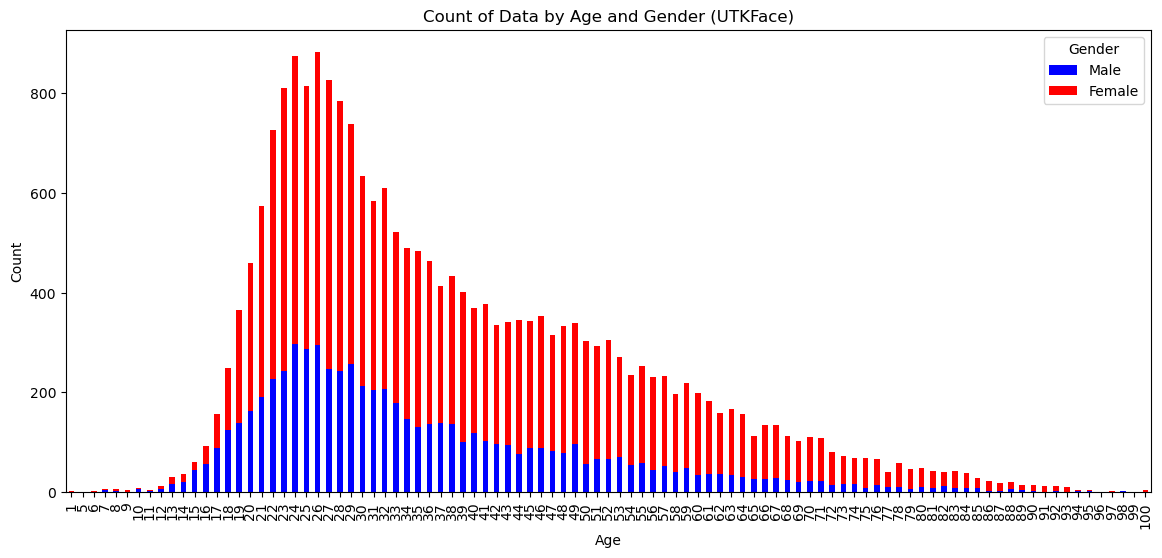

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('wiki_info.csv')
age_gender_count = df.groupby(['age', 'gender']).size().unstack(fill_value=0)

# 그래프 그리기
fig, ax = plt.subplots(figsize=(14, 6))
age_gender_count.plot(kind='bar', stacked=True, color=['blue', 'red'], ax=ax)
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Count of Data by Age and Gender (UTKFace)')
ax.legend(title='Gender', labels=['Male', 'Female'])
plt.show()


In [23]:
len(df)

22578

In [24]:
gender_count = df['gender'].value_counts()
print(gender_count)
print("0이 남자, 1이 여자입니다.")

1.0    15565
0.0     6573
Name: gender, dtype: int64
0이 남자, 1이 여자입니다.
